In [1]:
## Basic
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
## Excel
import os
#import xlwt
from openpyxl import load_workbook
## Data process
from scipy.interpolate import interp1d #Interpolation
from scipy.signal import savgol_filter #Smooth
import math
from math import dist
import time

import cv2

import random
from IPython import display
# aka import ipympl




In [14]:
neutron_signal =np.loadtxt("20211222_TOF_N_woPSD_g1g2_wPSD.txt")

In [15]:
print(len(neutron_signal[:]))

813


In [16]:
print(neutron_signal[:])

[[ 4.56200e+00  2.09991e-01  1.08100e+03]
 [ 2.25750e+02  2.81713e-01  6.07000e+02]
 [ 1.09380e+01  2.20111e-01  1.26300e+03]
 ...
 [-3.60080e+02  1.26844e-01  3.39000e+02]
 [-1.39680e+02  1.16522e-01  5.75000e+02]
 [ 2.35200e+00  2.47934e-01  6.05000e+02]]


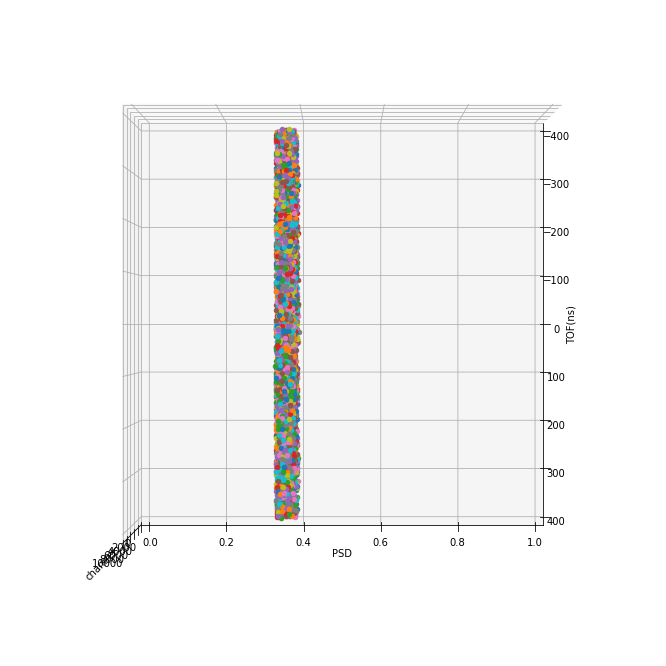

In [12]:
from matplotlib import interactive
interactive(True)


fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(projection='3d')

for i in range(5000):
    ax.scatter(neutron_signal[i][0], neutron_signal[i][1], neutron_signal[i][2])


#ax.set_adjustable('box')
ax.set_xlim3d(-400,400)
ax.set_ylim3d(0,1)
ax.set_zlim3d(0,10000)

#ax.set_xticks(0,1)
ax.set_xlabel('TOF(ns)')
ax.set_ylabel('PSD')
ax.set_zlabel('channel')
ax.view_init(90, 0)
 
plt.show()

In [17]:
from mayavi import mlab
from scipy import stats


x = np.array([])
y = np.array([])
z = np.array([])
for i in range(len(neutron_signal[:]) ):
    x = np.append(x,neutron_signal[i][0])
    y = np.append(y,neutron_signal[i][1])
    z = np.append(z,neutron_signal[i][2])





In [6]:
xyz = np.vstack([x,y,z])
kde = stats.gaussian_kde(xyz)
density = kde(xyz)

# Plot scatter with mayavi
figure = mlab.figure('DensityPlot')
pts = mlab.points3d(x, y, z, density, scale_mode='none', scale_factor=0.07)
mlab.axes()
mlab.show()

In [9]:
# Plot scatter with mayavi
figure = mlab.figure('DensityPlot')
figure.scene.disable_render = True

pts = mlab.points3d(x, y, z, density, scale_mode='none', scale_factor=0.07) 
mask = pts.glyph.mask_points
mask.maximum_number_of_points = x.size
mask.on_ratio = 1
pts.glyph.mask_input_points = True

figure.scene.disable_render = False 
mlab.axes()
mlab.show()

In [10]:
xyz = np.vstack([x,y,z])
kde = stats.gaussian_kde(xyz)

# Evaluate kde on a grid
xmin, ymin, zmin = x.min(), y.min(), z.min()
xmax, ymax, zmax = x.max(), y.max(), z.max()
xi, yi, zi = np.mgrid[xmin:xmax:30j, ymin:ymax:30j, zmin:zmax:30j]
coords = np.vstack([item.ravel() for item in [xi, yi, zi]]) 
density = kde(coords).reshape(xi.shape)

# Plot scatter with mayavi


In [ ]:
figure = mlab.figure('DensityPlot')

grid = mlab.pipeline.scalar_field(xi, yi, zi, density)
min = density.min()
max=density.max()
mlab.pipeline.volume(grid, vmin=min, vmax=min + .5*(max-min))

mlab.axes()
mlab.show()

In [7]:
import numpy as np
from scipy import stats
from mayavi import mlab
import multiprocessing

def calc_kde(data):
    return kde(data.T)


# Evaluate kde on a grid
xmin, ymin, zmin = x.min(), y.min(), z.min()
xmax, ymax, zmax = x.max(), y.max(), z.max()
xi, yi, zi = np.mgrid[xmin:xmax:30j, ymin:ymax:30j, zmin:zmax:30j]
coords = np.vstack([item.ravel() for item in [xi, yi, zi]]) 

# Multiprocessing
cores = multiprocessing.cpu_count()
pool = multiprocessing.Pool(processes=cores)
results = pool.map(calc_kde, np.array_split(coords.T, 2))
density = np.concatenate(results).reshape(xi.shape)

# Plot scatter with mayavi
figure = mlab.figure('DensityPlot')

grid = mlab.pipeline.scalar_field(xi, yi, zi, density)
min = density.min()
max=density.max()
mlab.pipeline.volume(grid, vmin=min, vmax=min + .5*(max-min))

mlab.axes()
mlab.show()

KeyboardInterrupt: 

In [18]:
x_2D=np.array([])
y_2D=np.array([])
z_2D=np.array([])
for i in range(len(neutron_signal[:]) ):
    x_2D = np.append(x_2D,int(neutron_signal[i][0]))
    y_2D = np.append(y_2D,round(neutron_signal[i][1],4))
    z_2D = np.append(z_2D,int(neutron_signal[i][2]))

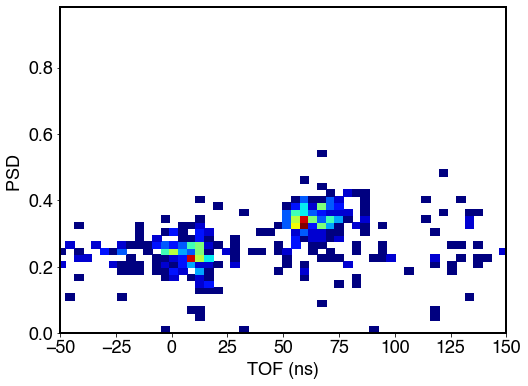

In [119]:
plt.rc('font', family='Helvetica')         # 自型
plt.rc('xtick', labelsize=18)          # X軸數字的文字大小
plt.rc('ytick', labelsize=18)          # Y軸數字的文字大小
plt.rcParams['axes.linewidth'] = 2     # 設置外框的寬度

fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格


plt.hist2d(x_2D, y_2D, bins=(200, 50),cmin=1, cmap=plt.cm.jet)
ax.set_xlabel('TOF (ns)',fontsize=18) # labelpad=10 與座標軸間的距離
ax.set_ylabel('PSD ',fontsize=18)

#plt.ylim(0.31,0.45)
plt.xlim(-50,150)

plt.show()

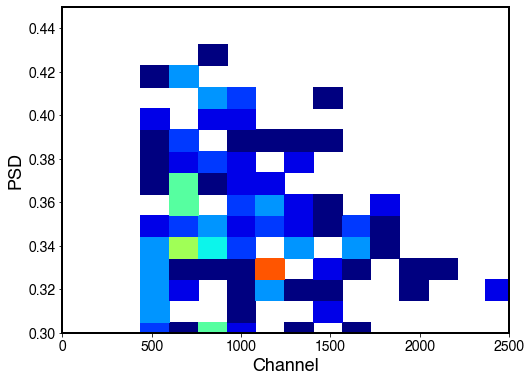

In [22]:
plt.rc('font', family='Helvetica')         # 自型
plt.rc('xtick', labelsize=14)          # X軸數字的文字大小
plt.rc('ytick', labelsize=14)          # Y軸數字的文字大小
plt.rcParams['axes.linewidth'] = 2     # 設置外框的寬度

fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

plt.hist2d(z_2D,y_2D, bins=(100, 100),cmin=2, cmap=plt.cm.jet)

ax.set_ylabel('PSD',fontsize=18) # labelpad=10 與座標軸間的距離
ax.set_xlabel('Channel',fontsize=18)
plt.ylim(0.3,0.45)
plt.xlim(0,2500)
plt.show()

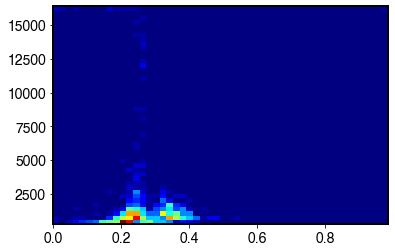

In [23]:
plt.hist2d(y_2D,z_2D, bins=(50, 50), cmap=plt.cm.jet)
plt.show()

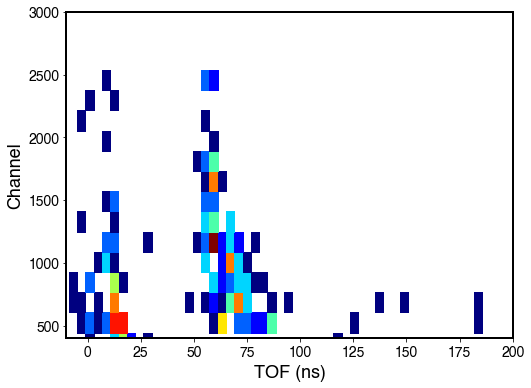

In [25]:
plt.rc('font', family='Helvetica')         # 自型
plt.rc('xtick', labelsize=14)          # X軸數字的文字大小
plt.rc('ytick', labelsize=14)          # Y軸數字的文字大小
plt.rcParams['axes.linewidth'] = 2     # 設置外框的寬度

fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

h=plt.hist2d(x_2D,z_2D, bins=(200, 100),cmin=2, cmap=plt.cm.jet)

ax.set_ylabel('Channel',fontsize=18) # labelpad=10 與座標軸間的距離
ax.set_xlabel('TOF (ns)',fontsize=18)
plt.ylim(400,3000)
plt.xlim(-10,200)
plt.show()

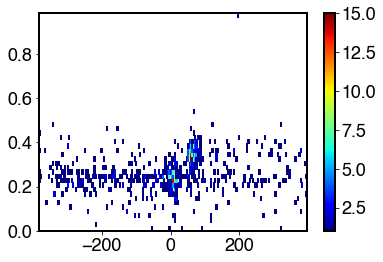

In [72]:
h= plt.hist2d(x_2D, y_2D, bins=(200, 50),cmin=1, cmap=plt.cm.jet)
plt.colorbar()
plt.show()

In [73]:
print(h)

(array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), array([-382.  , -378.11, -374.22, -370.33, -366.44, -362.55, -358.66,
       -354.77, -350.88, -346.99, -343.1 , -339.21, -335.32, -331.43,
       -327.54, -323.65, -319.76, -315.87, -311.98, -308.09, -304.2 ,
       -300.31, -296.42, -292.53, -288.64, -284.75, -280.86, -276.97,
       -273.08, -269.19, -265.3 , -261.41, -257.52, -253.63, -249.74,
       -245.85, -241.96, -238.07, -234.18, -230.29, -226.4 , -222.51,
       -218.62, -214.73, -210.84, -206.95, -203.06, -199.17, -195.28,
       -191.39, -187.5 , -183.61, -179.72, -175.83, -171.94, -168.05,
       -164.16, -160.27, -156.38, -152.49, -148.6 , -144.71, -140.82,
       -136.93, -133.04, -129.15, -125.26, -121.37, -117.48, -113.59,
       -109.7 , -105.

plt.rc('font', family='Helvetica')         # 自型
plt.rc('xtick', labelsize=14)          # X軸數字的文字大小
plt.rc('ytick', labelsize=14)          # Y軸數字的文字大小
plt.rcParams['axes.linewidth'] = 2     # 設置外框的寬度

fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

for i in np.arange(125,140,2):
    ax.plot(h[0][int(i)],label = str(i*4-400)+'ns' )

    
ax.set_ylabel('Counts',fontsize=18) # labelpad=10 與座標軸間的距離
ax.set_xlabel('Channel',fontsize=18)
plt.ylim(0,100)
plt.xlim(0,50)
plt.legend(fontsize = 18) 
plt.show()
 

In [93]:
bin_number=400    #切幾格
bin_width=1    #每格大小
hist, edges = np.histogram( #hist 每格裡面統計的數量 edges:每一格的邊界
    x_2D, #要分析的矩陣
    bins=bin_number, 
    range=(-400, 400), #範圍
    density=False) #是否Normalized成百分比

In [94]:
#print(len(hist),len(edges))
#print(hist)
#print(edges)
#print(edges[3])

In [95]:
Bin_center = []
for i in range(len(edges)-1):
    #print(i)
    Bin_center_single = round((edges[i]+edges[i+1])/2,2)
    Bin_center = np.append(Bin_center,Bin_center_single)
#print(Bin_center)

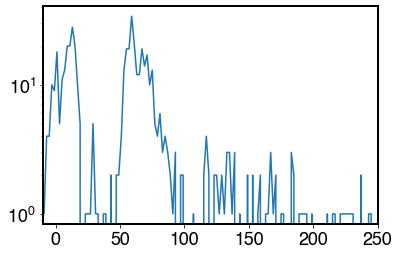

In [96]:
plt.plot(Bin_center,hist)
plt.xlim(-10,250)
plt.yscale('log')

In [79]:
neutron_signal_n =np.loadtxt("20211222_TOF_N_wPSD_g1g2_wPSD.txt")

In [81]:
x_2D_n=np.array([])
y_2D_n=np.array([])
z_2D_n=np.array([])
for i in range(len(neutron_signal_n[:]) ):
    x_2D_n = np.append(x_2D_n,int(neutron_signal_n[i][0]))
    y_2D_n = np.append(y_2D_n,round(neutron_signal_n[i][1],4))
    z_2D_n = np.append(z_2D_n,int(neutron_signal_n[i][2]))

In [97]:
bin_number=400    #切幾格
bin_width=1    #每格大小
hist_n, edges = np.histogram( #hist 每格裡面統計的數量 edges:每一格的邊界
    x_2D_n, #要分析的矩陣
    bins=bin_number, 
    range=(-400, 400), #範圍
    density=False) #是否Normalized成百分比

In [98]:
Bin_center = []
for i in range(len(edges)-1):
    #print(i)
    Bin_center_single = round((edges[i]+edges[i+1])/2,2)
    Bin_center = np.append(Bin_center,Bin_center_single)
#print(Bin_center)

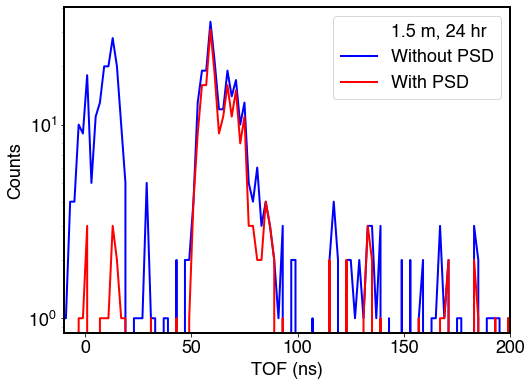

In [118]:
plt.rc('font', family='Helvetica')         # 自型
plt.rc('xtick', labelsize=18)          # X軸數字的文字大小
plt.rc('ytick', labelsize=18)          # Y軸數字的文字大小
plt.rcParams['axes.linewidth'] = 2     # 設置外框的寬度

fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

plt.plot([],[],' ',label = '1.5 m, 24 hr')
plt.plot(Bin_center,hist,'b',linewidth=2,label = 'Without PSD')
plt.plot(Bin_center,hist_n,'r',linewidth=2,label = 'With PSD')


ax.set_xlabel('TOF (ns)',fontsize=18)
ax.set_ylabel('Counts',fontsize=18) # labelpad=10 與座標軸間的距離
#plt.ylim(0,)
plt.xlim(-10,200)
plt.legend(fontsize=18)
plt.yscale('log')
plt.show()





In [3]:
g1_PSD     =np.array([])
g1_TOF     =np.array([])
g1_charge  =np.array([])
g2_PSD     =np.array([])
g2_TOF     =np.array([])
g2_charge  =np.array([])

In [24]:

for i in range(1000):
    g1_PSD     =np.append(g1_PSD,    random.uniform(0.1,0.3))
    g1_TOF     =np.append(g1_TOF,    random.uniform(-10,10))
    g1_charge  =np.append(g1_charge, random.uniform(0,1000))
    
    g2_PSD     =np.append(g2_PSD, random.uniform(0.4,0.5))
    g2_TOF     =np.append(g2_TOF, random.uniform(100,100))
    g2_charge  =np.append(g2_charge, random.uniform(0,1000))

In [4]:

g1_PSD     = np.random.normal(0.2,0.05,1000)
#g1_TOF     = np.random.normal(0,50,1000)

g2_PSD     = np.random.normal(0.5,0.02,1000)
g2_TOF     = np.random.normal(100,5,1000)
for i in range(1000):
    g1_TOF     =np.append(g1_TOF, random.uniform(0,120))
    g1_charge  =np.append(g1_charge, random.uniform(0,1000))
    g2_charge  =np.append(g2_charge, random.uniform(0,1000))

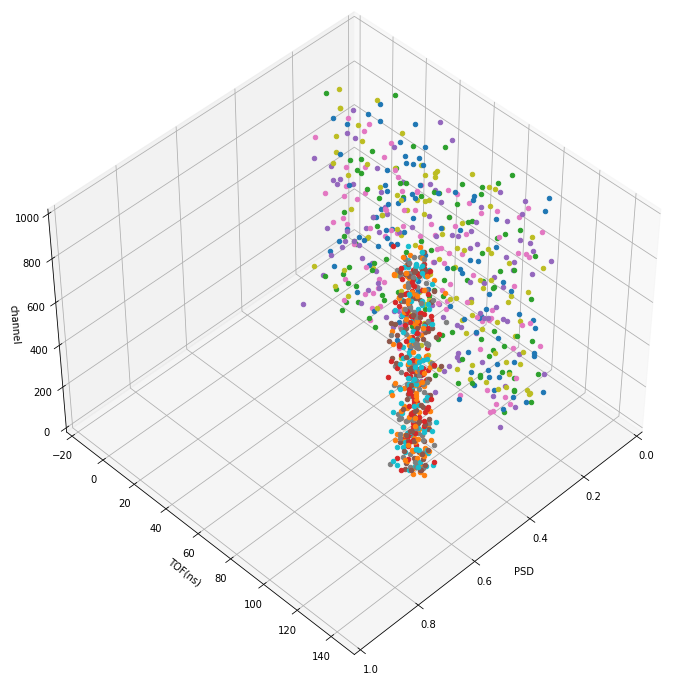

In [17]:
from matplotlib import interactive
interactive(True)


fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(projection='3d')

for i in range(500):
    ax.scatter(g1_PSD[i], g1_TOF[i], g1_charge[i])
    ax.scatter(g2_PSD[i], g2_TOF[i], g2_charge[i])

#ax.set_adjustable('box')
ax.set_xlim3d(0,1)
ax.set_ylim3d(-20,150)
ax.set_zlim3d(0,1000)

#ax.set_xticks(0,1)
ax.set_xlabel('PSD')
ax.set_ylabel('TOF(ns)')
ax.set_zlabel('channel')
ax.view_init(45, 45)
 
plt.show()